# Közlekedési hálózatok vizsgálata
## Szeged városi tömegközlekedés

TramTrain kivételével

In [45]:
import networkx as nx
import peartree as pt
import matplotlib.pyplot as plt
import osmnx as ox

In [46]:
### np.unicode is deprecated after version 1.20.0 and removed in 1.24.0
#import numpy as np
#
#np.unicode = np.unicode_

### pd.Seried.iteritems() is deprecated after version 1.5.0 and removed in 2.0
import pandas as pd

def iteritems(self):
  yield from self.items()
pd.Series.iteritems = iteritems


path = './gtfs-1.zip'
feed = pt.get_representative_feed(path)

start = 7*60*60  # 7:00 AM
end = 10*60*60  # 10:00 AM

G = pt.load_feed_as_graph(feed, start, end)

(<Figure size 1200x1200 with 1 Axes>, <Axes: >)

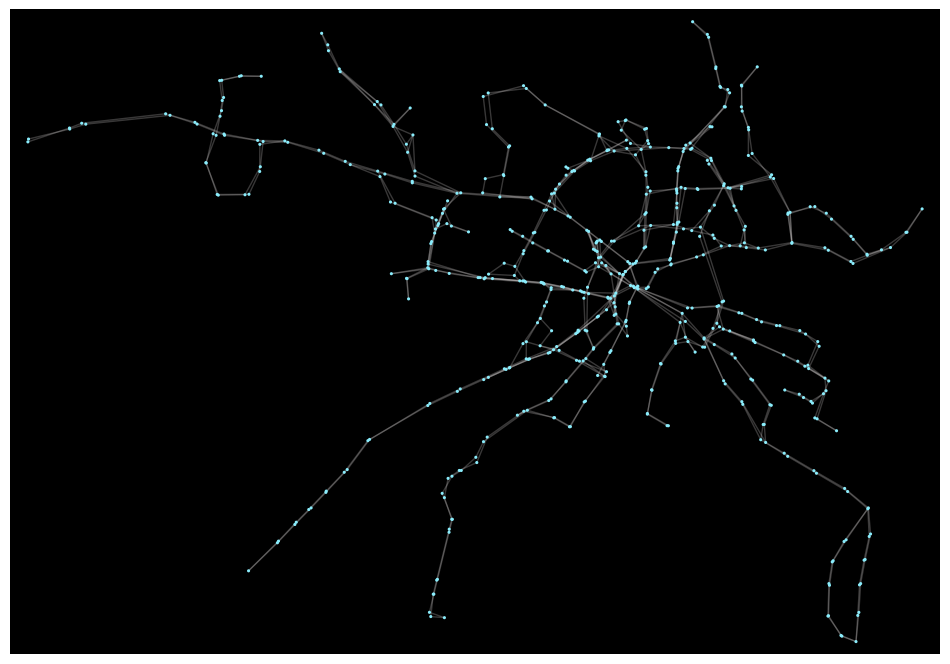

In [51]:
pt.plot.generate_plot(G)

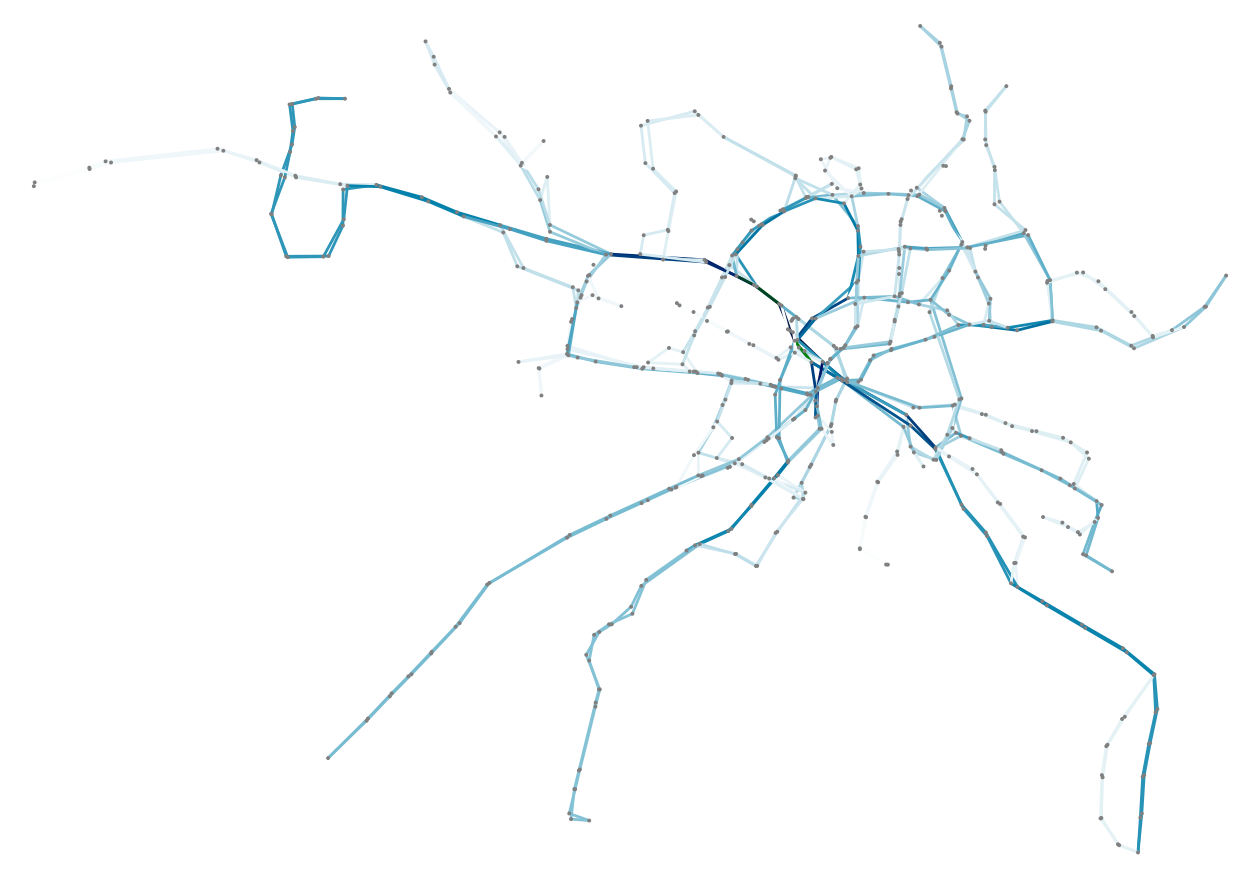

In [152]:
bc = nx.edge_betweenness_centrality(G)
max_edge, max_bc = max(bc.items(), key=lambda x: x[1])

ec = ["r" if edge == max_edge else "w" for edge in G.edges]
ns = [80 if edge == max_edge else 15 for edge in G.edges]

nx.set_edge_attributes(G, bc, "weight")

ec = ox.plot.get_edge_colors_by_attr(G, "weight", cmap="ocean_r")

fig, ax = ox.plot_graph(
    G,
    node_color="gray",
    edge_color=ec,
    node_size=8,
    edge_linewidth=2,
    figsize=(16,16),
    dpi=100,
    bgcolor="white"
)